
# Import Necessary Libraries


# Import libraries

In [25]:
import os 
print("hi")

hi


In [26]:
# Set the environment variable
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
#from natsort import natsorted # type: ignore
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import WeightedRandomSampler
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import time
import gc
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score as skl_precision_score
from sklearn.metrics import recall_score as skl_recall_score
from sklearn.metrics import f1_score as skl_f1_score
from sklearn.metrics import accuracy_score as skl_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import random
import warnings
import shutil
# Save metrics dictionary (H) after training completes
import pickle
import os
import timm
import efficientnet_pytorch



# Import the code from all .py files

from custom_dataset import CustomMelanomaDataset  # Import the custom dataset
from resnet_model import ResNetModel
from preprocessing_csv import PreprocessingCSV
from train_test_loop import train_and_test
from lesion_predictions import LesionPredictions
from FocalLoss import FocalLoss
from efficientnetB7_model import EfficientNetB7Model 
#from efficientnetV2_model import EfficientNetV2Model


#from malignant_augmentation import TrainMalignantAugmentor, TestMalignantAugmentor


In [28]:
warnings.filterwarnings("ignore")


In [29]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Create the full path to the CSV file
csv_path = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign     0.0  
1   unknown           benign     0.0  
2     nevus           benign     0.0  
3   unknown           benign     0.0  
4   unknown           benign     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null 

In [30]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Step 1: Define the universal path handling logic
SPLIT_CSV_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv')

# Universal Path Setup for Images
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')

# Paths for Train/Test CSVs
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_split.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')

# Create the full path to the CSV file
CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth_preprocess.csv')

# to overcome class imbalance
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

# save model after training/testing
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

#save metrics dictionary
# Set a specific directory to save the file
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

# save the plot PNG
PLOT_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')


In [33]:
'''
# Step : Create an instance of PreprocessingCSV
preprocessor = PreprocessingCSV(csv_path, BASE_DIR)

# Step : Execute the preprocessing steps
preprocessor.analyze_raw_data()
preprocessor.check_for_anomalies()
preprocessor.clean_data()
preprocessor.save_clean_data()
preprocessor.split_by_patient_id()
preprocessor.verify_preprocessed_data()
'''

'\n# Step : Create an instance of PreprocessingCSV\npreprocessor = PreprocessingCSV(csv_path, BASE_DIR)\n\n# Step : Execute the preprocessing steps\npreprocessor.analyze_raw_data()\npreprocessor.check_for_anomalies()\npreprocessor.clean_data()\npreprocessor.save_clean_data()\npreprocessor.split_by_patient_id()\npreprocessor.verify_preprocessed_data()\n'

# Ratio of dataset. Analysis of Benign/Malignant in dataset

In [54]:
'''
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 439

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 136


# Creating offline Augmentations for traing and test dataset to overcome class imbalance



# Ratio after Augmemntation of target Benign/Malignants in dataset

Here must run malignant_augmentation.py seperately.or run once here after all its purpose is served so never run


In [31]:
print(TRAIN_CSV_PATH)
print(IMAGE_DIR)
print(TEST_CSV_PATH)

/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/Train_JPEG/JPEG
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv


In [56]:
'''

class TrainMalignantAugmentor:
    def __init__(self, train_aug_csv, image_dir, augmentations_per_image=15):
        self.train_aug_csv = train_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.train_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for training dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.train_aug_csv, index=False)
        print(f"Updated metadata saved to {self.train_aug_csv}")
        print("Process finished successfully.")


class TestMalignantAugmentor:
    def __init__(self, test_aug_csv, image_dir, augmentations_per_image=10):
        self.test_aug_csv = test_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.test_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation (Test)", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for test dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.test_aug_csv, index=False)
        print(f"Updated metadata saved to {self.test_aug_csv}")
        print("Process finished successfully.")
'''

In [57]:
'''
# Initialize the augmentor for training data
train_augmentor = TrainMalignantAugmentor(
        train_aug_csv=TRAIN_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for training
train_augmentor.perform_augmentation()
train_augmentor.save_updated_metadata()
'''

Performing Image Augmentation: 100%|██████████| 24300/24300 [1:24:55<00:00,  4.77image/s]  


Image augmentations for training dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
Process finished successfully.


In [58]:
'''
# Initialize the augmentor for test data
test_augmentor = TestMalignantAugmentor(
        test_aug_csv=TEST_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for testing
test_augmentor.perform_augmentation()
test_augmentor.save_updated_metadata()
'''

Performing Image Augmentation (Test): 100%|██████████| 8230/8230 [17:36<00:00,  7.79image/s]


Image augmentations for test dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv
Process finished successfully.


# Ratio after Augmemntation of target Benign/Malignants in dataset

In [32]:
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

In [33]:

def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")


Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# 24k benign trained in 2 stages, 2 * (12k benign + 7K malignant) 

# Split the Benign into 2 phase trainnig.

In [61]:
'''
import random
import os
import pandas as pd

# Load the dataset
data = pd.read_csv(TRAIN_CSV_PATH)

# Verify the labels in the dataset
print("Unique values in 'benign_malignant' column:", data['benign_malignant'].unique())

# Group by patient_id
grouped = data.groupby('patient_id')

# Separate benign and malignant cases
benign_data = data[data['benign_malignant'] == 'benign']
malignant_data = data[data['benign_malignant'] == 'malignant']

# Check the number of benign and malignant samples before proceeding
print(f"Total benign cases: {len(benign_data)}")
print(f"Total malignant cases: {len(malignant_data)}")

if len(malignant_data) < 7024:
    print("Warning: Malignant data count is less than expected. Please check the data source or filtering logic.")

# Shuffle benign patient groups and split approximately in half
benign_patient_ids = list(benign_data['patient_id'].unique())
random.shuffle(benign_patient_ids)
split_index = len(benign_patient_ids) // 2

# Split benign data into two halves based on patient IDs
benign_pass1 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[:split_index])]
benign_pass2 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[split_index:])]

# Add all malignant cases to both pass1 and pass2
train_pass1 = pd.concat([benign_pass1, malignant_data], ignore_index=True)
train_pass2 = pd.concat([benign_pass2, malignant_data], ignore_index=True)

# Ensure the output directory exists
if not os.path.exists(os.path.dirname(TRAIN_CSV_PASS1)):
    os.makedirs(os.path.dirname(TRAIN_CSV_PASS1))

# Save the passes to their respective CSV files
train_pass1.to_csv(TRAIN_CSV_PASS1, index=False)
train_pass2.to_csv(TRAIN_CSV_PASS2, index=False)

print(f"Pass 1 saved to {TRAIN_CSV_PASS1}")
print(f"Pass 2 saved to {TRAIN_CSV_PASS2}")

'''

Unique values in 'benign_malignant' column: ['benign' 'malignant']
Total benign cases: 23861
Total malignant cases: 7024
Pass 1 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass1.csv
Pass 2 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass2.csv


In [34]:

# Count and print the number of benign and malignant cases in each training pass
def count_cases(csv_path):
    data = pd.read_csv(csv_path)
    benign_count = len(data[data['benign_malignant'] == 'benign'])
    malignant_count = len(data[data['benign_malignant'] == 'malignant'])
    return benign_count, malignant_count

benign_count_pass1, malignant_count_pass1 = count_cases(TRAIN_CSV_PASS1)
benign_count_pass2, malignant_count_pass2 = count_cases(TRAIN_CSV_PASS2)

print(f"\nPass 1 - Benign: {benign_count_pass1}, Malignant: {malignant_count_pass1}")
print(f"Pass 2 - Benign: {benign_count_pass2}, Malignant: {malignant_count_pass2}")



Pass 1 - Benign: 11334, Malignant: 7024
Pass 2 - Benign: 11334, Malignant: 7024


# Define Transformations

In [35]:
# Training Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(30),  # Random rotation for variety
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter for diversity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Testing Transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


# Define train and test datasets


In [36]:
# Initialize datasets for Pass 1 and Pass 2
train_pass1_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS1,  # CSV for Pass 1 with 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

train_pass2_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS2,  # CSV for Pass 2 with the remaining 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

test_dataset = CustomMelanomaDataset(
    csv_file=TEST_CSV_PATH,  # Test CSV with augmented malignant and original benign samples
    image_dir=IMAGE_DIR,
    transform=test_transforms,
    is_test=True
)


# configs

In [37]:
# Learning parameters
lr = 1e-5  # Keep the learning rate the same initially. adjust it based on training performance
NUM_EPOCHS = 30  # Increase to 20 for better convergence given more computational resources
BATCH_SIZE = 128  # Increase batch size to 64/128 to fully utilize the GPU memory
num_workers = 16  # Increase num_workers to 16 to leverage my 32 CPUs and 2GPUs to speed up data loading

# Determine if CUDA is available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PIN_MEMORY = True if torch.cuda.is_available() else False

print(f"[INFO] Using device: {DEVICE}")


[INFO] Using device: cuda


In [38]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}\n")

    # Loop through each GPU and print details
    for i in range(num_gpus):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"  - Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU available.")


Number of GPUs available: 2


GPU 0: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 765.95 MB
  - Memory Cached: 8298.00 MB

GPU 1: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 269.45 MB
  - Memory Cached: 7776.00 MB


# Define dataloaders, lossFunc, Optim

In [39]:
# Compute weights for Pass 1 dataset
malignant_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass1 = len(train_pass1_dataset)

# Set weights: higher for minority class (for Pass 1)
weights_pass1 = [
    benign_count_pass1 / total_count_pass1 if label == 0 else malignant_count_pass1 / total_count_pass1
    for label in train_pass1_dataset.metadata['target']
]
sampler_pass1 = WeightedRandomSampler(weights_pass1, len(weights_pass1))


In [40]:
# Compute weights for Pass 2 dataset
malignant_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass2 = len(train_pass2_dataset)

# Set weights: higher for minority class (for Pass 2)
weights_pass2 = [
    benign_count_pass2 / total_count_pass2 if label == 0 else malignant_count_pass2 / total_count_pass2
    for label in train_pass2_dataset.metadata['target']
]
sampler_pass2 = WeightedRandomSampler(weights_pass2, len(weights_pass2))


In [41]:

# Create DataLoaders for Pass 1, Pass 2, and Test dataset
# Create DataLoaders with weighted sampler for Pass 1 and Pass 2
train_pass1_loader = DataLoader(
    dataset=train_pass1_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass1,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

train_pass2_loader = DataLoader(
    dataset=train_pass2_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass2,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,  # No need to shuffle test data
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

print("DataLoaders created successfully.")

DataLoaders created successfully.


In [42]:
# Calculate steps per epoch
trainSteps1 = len(train_pass1_loader)
trainSteps2 = len(train_pass2_loader)

testSteps = len(test_loader)

print(f"[INFO] Training steps for Pass 1 per epoch: {trainSteps1}")
print(f"[INFO] Training steps for Pass 2 per epoch: {trainSteps2}")
print(f"[INFO] Testing steps per epoch: {testSteps}")


[INFO] Training steps for Pass 1 per epoch: 144
[INFO] Training steps for Pass 2 per epoch: 144
[INFO] Testing steps per epoch: 75


 # Initialize Model, Loss Function, and Optimizer

In [43]:
torch.cuda.empty_cache()


In [44]:
# Define the model, where we pass the number of metadata features (3 in this case)
num_metadata_features = 3  # Number of metadata features: sex, age, and site

# Efficientnet V2-L model
#model = EfficientNetV2Model(num_metadata_features).to(DEVICE)

# EfficientnetB7 model
model = EfficientNetB7Model(num_metadata_features).to(DEVICE)
# Use DataParallel if more than one GPU is available
if torch.cuda.device_count() == 2:
    model = nn.DataParallel(model)


#RESNET-50 MODEL (already worked on it)
# model = ResNetModel(num_metadata_features).to(DEVICE)

# Loss function and optimizer #old lossFunc
#lossFunc = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
lossFunc = FocalLoss(alpha=3, gamma=2)  # Adjust alpha to give more weight to malignant class

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#old scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler
# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

Loaded pretrained weights for efficientnet-b7


In [45]:

# Print available model names
#print(timm.list_models())


In [46]:
print(model)

DataParallel(
  (module): EfficientNetB7Model(
    (efficientnet): EfficientNet(
      (_conv_stem): Conv2dStaticSamePadding(
        3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
        (static_padding): ZeroPad2d((0, 1, 0, 1))
      )
      (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_blocks): ModuleList(
        (0): MBConvBlock(
          (_depthwise_conv): Conv2dStaticSamePadding(
            64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
            (static_padding): ZeroPad2d((1, 1, 1, 1))
          )
          (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (_se_reduce): Conv2dStaticSamePadding(
            64, 16, kernel_size=(1, 1), stride=(1, 1)
            (static_padding): Identity()
          )
          (_se_expand): Conv2dStaticSamePadding(
            16, 64, kernel_size=(1, 1), stride=(1, 1)
            (stati

In [47]:
gc.collect()
torch.cuda.empty_cache()


# Initialize Training History Dictionary

#  Training Loop Implementation with Metric Tracking and Validation

In [48]:
# Train on Pass 1 Dataset
print("Starting training with Pass 1 Dataset")
H_pass1 = train_and_test(
    model=model,
    train_loader=train_pass1_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)
# After training, we can use H for further analysis or plotting


Starting training with Pass 1 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [01:33<00:00,  1.24s/batch]


[INFO] EPOCH: 1/30
Train loss: 0.406416
Train Accuracy: 0.793387
Train Precision: 0.672561
Train Recall: 0.482745
Train F1 Score: 0.562060
Train ROC AUC: 0.821216
Test loss: 0.321497
Test Accuracy: 0.863191
Test Precision: 0.894940
Test Recall: 0.151738
Test F1 Score: 0.259481
Test ROC AUC: 0.700226
Test Average Precision Score: 0.455430


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:11<00:00,  1.05batch/s]


[INFO] EPOCH: 2/30
Train loss: 0.175694
Train Accuracy: 0.933108
Train Precision: 0.915821
Train Recall: 0.839147
Train F1 Score: 0.875809
Train ROC AUC: 0.959426
Test loss: 0.215663
Test Accuracy: 0.906569
Test Precision: 0.948977
Test Recall: 0.439171
Test F1 Score: 0.600459
Test ROC AUC: 0.878841
Test Average Precision Score: 0.734070


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:14<00:00,  1.01batch/s]


[INFO] EPOCH: 3/30
Train loss: 0.127057
Train Accuracy: 0.948851
Train Precision: 0.945631
Train Recall: 0.867624
Train F1 Score: 0.904950
Train ROC AUC: 0.973240
Test loss: 0.170983
Test Accuracy: 0.925547
Test Precision: 0.972083
Test Recall: 0.548128
Test F1 Score: 0.700990
Test ROC AUC: 0.930912
Test Average Precision Score: 0.839289


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.12s/batch]


[INFO] EPOCH: 4/30
Train loss: 0.108928
Train Accuracy: 0.956313
Train Precision: 0.956100
Train Recall: 0.884075
Train F1 Score: 0.918678
Train ROC AUC: 0.979418
Test loss: 0.141415
Test Accuracy: 0.943379
Test Precision: 0.980264
Test Recall: 0.658422
Test F1 Score: 0.787738
Test ROC AUC: 0.954335
Test Average Precision Score: 0.890167


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 5/30
Train loss: 0.101296
Train Accuracy: 0.958220
Train Precision: 0.960351
Train Recall: 0.885048
Train F1 Score: 0.921164
Train ROC AUC: 0.982371
Test loss: 0.124728
Test Accuracy: 0.953493
Test Precision: 0.975681
Test Recall: 0.731283
Test F1 Score: 0.835986
Test ROC AUC: 0.960541
Test Average Precision Score: 0.906321


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 6/30
Train loss: 0.100066
Train Accuracy: 0.958547
Train Precision: 0.959057
Train Recall: 0.886994
Train F1 Score: 0.921619
Train ROC AUC: 0.982205
Test loss: 0.128887
Test Accuracy: 0.948801
Test Precision: 0.979018
Test Recall: 0.695856
Test F1 Score: 0.813500
Test ROC AUC: 0.961054
Test Average Precision Score: 0.902256


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.11s/batch]


[INFO] EPOCH: 7/30
Train loss: 0.092657
Train Accuracy: 0.962796
Train Precision: 0.964783
Train Recall: 0.898645
Train F1 Score: 0.930540
Train ROC AUC: 0.984729
Test loss: 0.123062
Test Accuracy: 0.950052
Test Precision: 0.979252
Test Recall: 0.703877
Test F1 Score: 0.819038
Test ROC AUC: 0.964796
Test Average Precision Score: 0.910501


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:14<00:00,  1.00batch/s]


[INFO] EPOCH: 8/30
Train loss: 0.085853
Train Accuracy: 0.965574
Train Precision: 0.971860
Train Recall: 0.904487
Train F1 Score: 0.936964
Train ROC AUC: 0.987155
Test loss: 0.105889
Test Accuracy: 0.960897
Test Precision: 0.984104
Test Recall: 0.769385
Test F1 Score: 0.863598
Test ROC AUC: 0.971355
Test Average Precision Score: 0.929532


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 9/30
Train loss: 0.080148
Train Accuracy: 0.966445
Train Precision: 0.967969
Train Recall: 0.906781
Train F1 Score: 0.936377
Train ROC AUC: 0.988565
Test loss: 0.107858
Test Accuracy: 0.958394
Test Precision: 0.989559
Test Recall: 0.745989
Test F1 Score: 0.850683
Test ROC AUC: 0.970510
Test Average Precision Score: 0.927070


Epoch 10/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 10/30
Train loss: 0.078035
Train Accuracy: 0.968679
Train Precision: 0.976803
Train Recall: 0.908770
Train F1 Score: 0.941559
Train ROC AUC: 0.989140
Test loss: 0.104922
Test Accuracy: 0.960271
Test Precision: 0.978493
Test Recall: 0.772727
Test F1 Score: 0.863521
Test ROC AUC: 0.971393
Test Average Precision Score: 0.928370


Epoch 11/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 11/30
Train loss: 0.072307
Train Accuracy: 0.968243
Train Precision: 0.970239
Train Recall: 0.913759
Train F1 Score: 0.941153
Train ROC AUC: 0.991220
Test loss: 0.102365
Test Accuracy: 0.961314
Test Precision: 0.976234
Test Recall: 0.782754
Test F1 Score: 0.868853
Test ROC AUC: 0.972945
Test Average Precision Score: 0.931121


Epoch 12/30 running...


Testing: 100%|██████████| 75/75 [01:15<00:00,  1.00s/batch]


[INFO] EPOCH: 12/30
Train loss: 0.071326
Train Accuracy: 0.969005
Train Precision: 0.971573
Train Recall: 0.918430
Train F1 Score: 0.944254
Train ROC AUC: 0.991761
Test loss: 0.112065
Test Accuracy: 0.957143
Test Precision: 0.988370
Test Recall: 0.739305
Test F1 Score: 0.845884
Test ROC AUC: 0.970880
Test Average Precision Score: 0.927249


Epoch 13/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 13/30
Train loss: 0.068018
Train Accuracy: 0.970748
Train Precision: 0.974739
Train Recall: 0.918191
Train F1 Score: 0.945620
Train ROC AUC: 0.992225
Test loss: 0.108340
Test Accuracy: 0.956726
Test Precision: 0.970381
Test Recall: 0.760027
Test F1 Score: 0.852418
Test ROC AUC: 0.971146
Test Average Precision Score: 0.925695


Epoch 14/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.04s/batch]


[INFO] EPOCH: 14/30
Train loss: 0.065567
Train Accuracy: 0.972437
Train Precision: 0.971102
Train Recall: 0.927154
Train F1 Score: 0.948619
Train ROC AUC: 0.992776
Test loss: 0.111257
Test Accuracy: 0.956830
Test Precision: 0.984608
Test Recall: 0.741979
Test F1 Score: 0.846245
Test ROC AUC: 0.972242
Test Average Precision Score: 0.929290


Epoch 15/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.06s/batch]


[INFO] EPOCH: 15/30
Train loss: 0.060315
Train Accuracy: 0.973145
Train Precision: 0.974979
Train Recall: 0.926872
Train F1 Score: 0.950317
Train ROC AUC: 0.994207
Test loss: 0.106097
Test Accuracy: 0.960063
Test Precision: 0.975018
Test Recall: 0.776070
Test F1 Score: 0.864242
Test ROC AUC: 0.973269
Test Average Precision Score: 0.932127


Epoch 16/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 16/30
Train loss: 0.057985
Train Accuracy: 0.973908
Train Precision: 0.974924
Train Recall: 0.930712
Train F1 Score: 0.952305
Train ROC AUC: 0.994565
Test loss: 0.112016
Test Accuracy: 0.958081
Test Precision: 0.972649
Test Recall: 0.766043
Test F1 Score: 0.857070
Test ROC AUC: 0.972833
Test Average Precision Score: 0.929614


Epoch 17/30 running...


Testing: 100%|██████████| 75/75 [01:24<00:00,  1.12s/batch]


[INFO] EPOCH: 17/30
Train loss: 0.052996
Train Accuracy: 0.975705
Train Precision: 0.974934
Train Recall: 0.936753
Train F1 Score: 0.955462
Train ROC AUC: 0.995498
Test loss: 0.115647
Test Accuracy: 0.957247
Test Precision: 0.967137
Test Recall: 0.768048
Test F1 Score: 0.856171
Test ROC AUC: 0.970179
Test Average Precision Score: 0.923564


Epoch 18/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 18/30
Train loss: 0.052546
Train Accuracy: 0.977231
Train Precision: 0.974816
Train Recall: 0.941653
Train F1 Score: 0.957948
Train ROC AUC: 0.995294
Test loss: 0.108295
Test Accuracy: 0.956726
Test Precision: 0.949708
Test Recall: 0.790107
Test F1 Score: 0.862587
Test ROC AUC: 0.971080
Test Average Precision Score: 0.924765


Epoch 19/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.10s/batch]


[INFO] EPOCH: 19/30
Train loss: 0.047087
Train Accuracy: 0.979028
Train Precision: 0.977801
Train Recall: 0.944300
Train F1 Score: 0.960758
Train ROC AUC: 0.996244
Test loss: 0.121123
Test Accuracy: 0.957873
Test Precision: 0.973092
Test Recall: 0.764037
Test F1 Score: 0.855985
Test ROC AUC: 0.969576
Test Average Precision Score: 0.924186


Epoch 20/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 20/30
Train loss: 0.048198
Train Accuracy: 0.979573
Train Precision: 0.979622
Train Recall: 0.944467
Train F1 Score: 0.961723
Train ROC AUC: 0.995794
Test loss: 0.123598
Test Accuracy: 0.957769
Test Precision: 0.974548
Test Recall: 0.761364
Test F1 Score: 0.854865
Test ROC AUC: 0.969127
Test Average Precision Score: 0.923277


Epoch 21/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.11s/batch]


[INFO] EPOCH: 21/30
Train loss: 0.047269
Train Accuracy: 0.980172
Train Precision: 0.979858
Train Recall: 0.947845
Train F1 Score: 0.963585
Train ROC AUC: 0.996228
Test loss: 0.125266
Test Accuracy: 0.957560
Test Precision: 0.973023
Test Recall: 0.762032
Test F1 Score: 0.854699
Test ROC AUC: 0.970277
Test Average Precision Score: 0.923425


Epoch 22/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 22/30
Train loss: 0.048264
Train Accuracy: 0.978974
Train Precision: 0.977268
Train Recall: 0.947419
Train F1 Score: 0.962112
Train ROC AUC: 0.996303
Test loss: 0.120453
Test Accuracy: 0.957873
Test Precision: 0.966355
Test Recall: 0.773396
Test F1 Score: 0.859175
Test ROC AUC: 0.969176
Test Average Precision Score: 0.921661


Epoch 23/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 23/30
Train loss: 0.039805
Train Accuracy: 0.982896
Train Precision: 0.982058
Train Recall: 0.957148
Train F1 Score: 0.969443
Train ROC AUC: 0.997649
Test loss: 0.127199
Test Accuracy: 0.956726
Test Precision: 0.968440
Test Recall: 0.762701
Test F1 Score: 0.853345
Test ROC AUC: 0.968371
Test Average Precision Score: 0.919361


Epoch 24/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 24/30
Train loss: 0.042311
Train Accuracy: 0.981153
Train Precision: 0.978331
Train Recall: 0.953461
Train F1 Score: 0.965736
Train ROC AUC: 0.997257
Test loss: 0.125200
Test Accuracy: 0.957039
Test Precision: 0.966129
Test Recall: 0.768048
Test F1 Score: 0.855776
Test ROC AUC: 0.970226
Test Average Precision Score: 0.922992


Epoch 25/30 running...


Testing: 100%|██████████| 75/75 [01:14<00:00,  1.00batch/s]


[INFO] EPOCH: 25/30
Train loss: 0.040607
Train Accuracy: 0.982351
Train Precision: 0.980482
Train Recall: 0.956108
Train F1 Score: 0.968142
Train ROC AUC: 0.997233
Test loss: 0.134085
Test Accuracy: 0.955996
Test Precision: 0.976191
Test Recall: 0.747326
Test F1 Score: 0.846563
Test ROC AUC: 0.967934
Test Average Precision Score: 0.919847


Epoch 26/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.04s/batch]


[INFO] EPOCH: 26/30
Train loss: 0.037218
Train Accuracy: 0.983658
Train Precision: 0.982227
Train Recall: 0.957578
Train F1 Score: 0.969746
Train ROC AUC: 0.997865
Test loss: 0.132640
Test Accuracy: 0.956413
Test Precision: 0.972768
Test Recall: 0.754679
Test F1 Score: 0.849957
Test ROC AUC: 0.968886
Test Average Precision Score: 0.920885


Epoch 27/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.08s/batch]


[INFO] EPOCH: 27/30
Train loss: 0.040170
Train Accuracy: 0.982297
Train Precision: 0.977147
Train Recall: 0.959567
Train F1 Score: 0.968277
Train ROC AUC: 0.997420
Test loss: 0.130479
Test Accuracy: 0.955787
Test Precision: 0.965305
Test Recall: 0.760695
Test F1 Score: 0.850872
Test ROC AUC: 0.968430
Test Average Precision Score: 0.919124


Epoch 28/30 running...


Testing: 100%|██████████| 75/75 [01:25<00:00,  1.14s/batch]


[INFO] EPOCH: 28/30
Train loss: 0.034870
Train Accuracy: 0.984584
Train Precision: 0.982534
Train Recall: 0.963280
Train F1 Score: 0.972812
Train ROC AUC: 0.998244
Test loss: 0.129373
Test Accuracy: 0.955787
Test Precision: 0.963403
Test Recall: 0.763369
Test F1 Score: 0.851800
Test ROC AUC: 0.968836
Test Average Precision Score: 0.920487


Epoch 29/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.12s/batch]


[INFO] EPOCH: 29/30
Train loss: 0.033883
Train Accuracy: 0.985619
Train Precision: 0.982932
Train Recall: 0.964722
Train F1 Score: 0.973742
Train ROC AUC: 0.998179
Test loss: 0.129561
Test Accuracy: 0.955266
Test Precision: 0.954460
Test Recall: 0.772727
Test F1 Score: 0.854033
Test ROC AUC: 0.968795
Test Average Precision Score: 0.919155


Epoch 30/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.11s/batch]

[INFO] EPOCH: 30/30
Train loss: 0.034950
Train Accuracy: 0.984258
Train Precision: 0.980012
Train Recall: 0.962883
Train F1 Score: 0.971372
Train ROC AUC: 0.998049
Test loss: 0.135045
Test Accuracy: 0.955996
Test Precision: 0.964887
Test Recall: 0.762701
Test F1 Score: 0.851962
Test ROC AUC: 0.969456
Test Average Precision Score: 0.920753

[INFO] Total time taken to train the model: 6760.0 seconds


# Saving the metrics for Pass 1 in H

In [49]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass1, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass1.pkl


In [50]:
# Train on Pass 2 Dataset
print("Starting training with Pass 2 Dataset")
H_pass2 = train_and_test(
    model=model,
    train_loader=train_pass2_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)


Starting training with Pass 2 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 1/30
Train loss: 0.033245
Train Accuracy: 0.985293
Train Precision: 0.981425
Train Recall: 0.964676
Train F1 Score: 0.972978
Train ROC AUC: 0.998353
Test loss: 0.136766
Test Accuracy: 0.955370
Test Precision: 0.963754
Test Recall: 0.760027
Test F1 Score: 0.849852
Test ROC AUC: 0.969950
Test Average Precision Score: 0.920272


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 2/30
Train loss: 0.031636
Train Accuracy: 0.985728
Train Precision: 0.982916
Train Recall: 0.965652
Train F1 Score: 0.974208
Train ROC AUC: 0.998525
Test loss: 0.140345
Test Accuracy: 0.955579
Test Precision: 0.961927
Test Recall: 0.764037
Test F1 Score: 0.851638
Test ROC AUC: 0.969150
Test Average Precision Score: 0.918967


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.06s/batch]


[INFO] EPOCH: 3/30
Train loss: 0.033493
Train Accuracy: 0.986110
Train Precision: 0.983346
Train Recall: 0.967791
Train F1 Score: 0.975507
Train ROC AUC: 0.998254
Test loss: 0.139050
Test Accuracy: 0.956204
Test Precision: 0.961185
Test Recall: 0.769385
Test F1 Score: 0.854657
Test ROC AUC: 0.970397
Test Average Precision Score: 0.921560


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 4/30
Train loss: 0.031479
Train Accuracy: 0.985674
Train Precision: 0.982175
Train Recall: 0.965735
Train F1 Score: 0.973885
Train ROC AUC: 0.998539
Test loss: 0.144644
Test Accuracy: 0.953806
Test Precision: 0.962807
Test Recall: 0.750668
Test F1 Score: 0.843606
Test ROC AUC: 0.969909
Test Average Precision Score: 0.919446


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 5/30
Train loss: 0.028561
Train Accuracy: 0.987254
Train Precision: 0.982838
Train Recall: 0.970826
Train F1 Score: 0.976795
Train ROC AUC: 0.998694
Test loss: 0.156569
Test Accuracy: 0.952033
Test Precision: 0.962257
Test Recall: 0.739305
Test F1 Score: 0.836174
Test ROC AUC: 0.966907
Test Average Precision Score: 0.912158


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:24<00:00,  1.12s/batch]


[INFO] EPOCH: 6/30
Train loss: 0.029792
Train Accuracy: 0.987199
Train Precision: 0.984304
Train Recall: 0.969472
Train F1 Score: 0.976831
Train ROC AUC: 0.998652
Test loss: 0.155565
Test Accuracy: 0.952346
Test Precision: 0.962355
Test Recall: 0.741310
Test F1 Score: 0.837493
Test ROC AUC: 0.967332
Test Average Precision Score: 0.913515


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 7/30
Train loss: 0.027060
Train Accuracy: 0.987526
Train Precision: 0.983719
Train Recall: 0.971711
Train F1 Score: 0.977678
Train ROC AUC: 0.998932
Test loss: 0.147793
Test Accuracy: 0.953806
Test Precision: 0.953473
Test Recall: 0.764037
Test F1 Score: 0.848308
Test ROC AUC: 0.968189
Test Average Precision Score: 0.915662


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.09s/batch]


[INFO] EPOCH: 8/30
Train loss: 0.025144
Train Accuracy: 0.989977
Train Precision: 0.987390
Train Recall: 0.976059
Train F1 Score: 0.981692
Train ROC AUC: 0.998959
Test loss: 0.155150
Test Accuracy: 0.955474
Test Precision: 0.969092
Test Recall: 0.753342
Test F1 Score: 0.847705
Test ROC AUC: 0.968970
Test Average Precision Score: 0.919291


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.05s/batch]


[INFO] EPOCH: 9/30
Train loss: 0.027926
Train Accuracy: 0.986763
Train Precision: 0.982641
Train Recall: 0.970339
Train F1 Score: 0.976451
Train ROC AUC: 0.998848
Test loss: 0.147744
Test Accuracy: 0.954223
Test Precision: 0.955449
Test Recall: 0.764037
Test F1 Score: 0.849089
Test ROC AUC: 0.969262
Test Average Precision Score: 0.918024


Epoch 10/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 10/30
Train loss: 0.025222
Train Accuracy: 0.989051
Train Precision: 0.985462
Train Recall: 0.975306
Train F1 Score: 0.980358
Train ROC AUC: 0.998993
Test loss: 0.154391
Test Accuracy: 0.952450
Test Precision: 0.952963
Test Recall: 0.755348
Test F1 Score: 0.842725
Test ROC AUC: 0.967641
Test Average Precision Score: 0.913342


Epoch 11/30 running...


Testing: 100%|██████████| 75/75 [01:15<00:00,  1.01s/batch]


[INFO] EPOCH: 11/30
Train loss: 0.025873
Train Accuracy: 0.988942
Train Precision: 0.986100
Train Recall: 0.972777
Train F1 Score: 0.979393
Train ROC AUC: 0.998894
Test loss: 0.162802
Test Accuracy: 0.951616
Test Precision: 0.956845
Test Recall: 0.743984
Test F1 Score: 0.837094
Test ROC AUC: 0.966658
Test Average Precision Score: 0.911157


Epoch 12/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 12/30
Train loss: 0.022682
Train Accuracy: 0.990740
Train Precision: 0.988716
Train Recall: 0.978437
Train F1 Score: 0.983549
Train ROC AUC: 0.999188
Test loss: 0.166947
Test Accuracy: 0.951512
Test Precision: 0.960152
Test Recall: 0.738636
Test F1 Score: 0.834952
Test ROC AUC: 0.966746
Test Average Precision Score: 0.911941


Epoch 13/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 13/30
Train loss: 0.023124
Train Accuracy: 0.989759
Train Precision: 0.987234
Train Recall: 0.976655
Train F1 Score: 0.981916
Train ROC AUC: 0.999300
Test loss: 0.165989
Test Accuracy: 0.951095
Test Precision: 0.951979
Test Recall: 0.747326
Test F1 Score: 0.837329
Test ROC AUC: 0.965076
Test Average Precision Score: 0.907130


Epoch 14/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.06s/batch]


[INFO] EPOCH: 14/30
Train loss: 0.021903
Train Accuracy: 0.990794
Train Precision: 0.988055
Train Recall: 0.978509
Train F1 Score: 0.983259
Train ROC AUC: 0.999276
Test loss: 0.162612
Test Accuracy: 0.951825
Test Precision: 0.949532
Test Recall: 0.756016
Test F1 Score: 0.841795
Test ROC AUC: 0.965512
Test Average Precision Score: 0.908381


Epoch 15/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.06s/batch]


[INFO] EPOCH: 15/30
Train loss: 0.022312
Train Accuracy: 0.990631
Train Precision: 0.989130
Train Recall: 0.977744
Train F1 Score: 0.983404
Train ROC AUC: 0.999331
Test loss: 0.170738
Test Accuracy: 0.950365
Test Precision: 0.948931
Test Recall: 0.746658
Test F1 Score: 0.835730
Test ROC AUC: 0.963752
Test Average Precision Score: 0.903836


Epoch 16/30 running...


Testing: 100%|██████████| 75/75 [01:22<00:00,  1.10s/batch]


[INFO] EPOCH: 16/30
Train loss: 0.022282
Train Accuracy: 0.990576
Train Precision: 0.989247
Train Recall: 0.977211
Train F1 Score: 0.983192
Train ROC AUC: 0.999353
Test loss: 0.170175
Test Accuracy: 0.947862
Test Precision: 0.939278
Test Recall: 0.743316
Test F1 Score: 0.829885
Test ROC AUC: 0.963034
Test Average Precision Score: 0.901594


Epoch 17/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.08s/batch]


[INFO] EPOCH: 17/30
Train loss: 0.022322
Train Accuracy: 0.989977
Train Precision: 0.986776
Train Recall: 0.977649
Train F1 Score: 0.982191
Train ROC AUC: 0.999261
Test loss: 0.171933
Test Accuracy: 0.949009
Test Precision: 0.942037
Test Recall: 0.747326
Test F1 Score: 0.833461
Test ROC AUC: 0.963015
Test Average Precision Score: 0.902757


Epoch 18/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 18/30
Train loss: 0.021863
Train Accuracy: 0.990849
Train Precision: 0.986103
Train Recall: 0.981110
Train F1 Score: 0.983600
Train ROC AUC: 0.999321
Test loss: 0.168877
Test Accuracy: 0.949844
Test Precision: 0.942425
Test Recall: 0.752674
Test F1 Score: 0.836929
Test ROC AUC: 0.964218
Test Average Precision Score: 0.905625


Epoch 19/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 19/30
Train loss: 0.022925
Train Accuracy: 0.990249
Train Precision: 0.987790
Train Recall: 0.976648
Train F1 Score: 0.982187
Train ROC AUC: 0.999145
Test loss: 0.170612
Test Accuracy: 0.949739
Test Precision: 0.945044
Test Recall: 0.747995
Test F1 Score: 0.835052
Test ROC AUC: 0.963972
Test Average Precision Score: 0.905130


Epoch 20/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 20/30
Train loss: 0.023568
Train Accuracy: 0.990086
Train Precision: 0.987637
Train Recall: 0.976902
Train F1 Score: 0.982240
Train ROC AUC: 0.999128
Test loss: 0.168984
Test Accuracy: 0.950156
Test Precision: 0.945677
Test Recall: 0.750000
Test F1 Score: 0.836548
Test ROC AUC: 0.964525
Test Average Precision Score: 0.906445


Epoch 21/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 21/30
Train loss: 0.021068
Train Accuracy: 0.990631
Train Precision: 0.986855
Train Recall: 0.979552
Train F1 Score: 0.983190
Train ROC AUC: 0.999292
Test loss: 0.172631
Test Accuracy: 0.949531
Test Precision: 0.947667
Test Recall: 0.742647
Test F1 Score: 0.832723
Test ROC AUC: 0.964449
Test Average Precision Score: 0.906228


Epoch 22/30 running...


Testing: 100%|██████████| 75/75 [01:20<00:00,  1.07s/batch]


[INFO] EPOCH: 22/30
Train loss: 0.024971
Train Accuracy: 0.988942
Train Precision: 0.985116
Train Recall: 0.975373
Train F1 Score: 0.980220
Train ROC AUC: 0.998998
Test loss: 0.164273
Test Accuracy: 0.951408
Test Precision: 0.947560
Test Recall: 0.756016
Test F1 Score: 0.841020
Test ROC AUC: 0.965672
Test Average Precision Score: 0.909165


Epoch 23/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]


[INFO] EPOCH: 23/30
Train loss: 0.019736
Train Accuracy: 0.990958
Train Precision: 0.986750
Train Recall: 0.981015
Train F1 Score: 0.983874
Train ROC AUC: 0.999510
Test loss: 0.164667
Test Accuracy: 0.951199
Test Precision: 0.947023
Test Recall: 0.755348
Test F1 Score: 0.840395
Test ROC AUC: 0.966040
Test Average Precision Score: 0.909993


Epoch 24/30 running...


Testing: 100%|██████████| 75/75 [01:17<00:00,  1.03s/batch]


[INFO] EPOCH: 24/30
Train loss: 0.020901
Train Accuracy: 0.990522
Train Precision: 0.987472
Train Recall: 0.977596
Train F1 Score: 0.982509
Train ROC AUC: 0.999331
Test loss: 0.169123
Test Accuracy: 0.950574
Test Precision: 0.948563
Test Recall: 0.748663
Test F1 Score: 0.836841
Test ROC AUC: 0.965285
Test Average Precision Score: 0.907786


Epoch 25/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.12s/batch]


[INFO] EPOCH: 25/30
Train loss: 0.021700
Train Accuracy: 0.990685
Train Precision: 0.989117
Train Recall: 0.976716
Train F1 Score: 0.982878
Train ROC AUC: 0.999304
Test loss: 0.171137
Test Accuracy: 0.950886
Test Precision: 0.949147
Test Recall: 0.750000
Test F1 Score: 0.837903
Test ROC AUC: 0.964718
Test Average Precision Score: 0.907525


Epoch 26/30 running...


Testing: 100%|██████████| 75/75 [01:23<00:00,  1.12s/batch]


[INFO] EPOCH: 26/30
Train loss: 0.020700
Train Accuracy: 0.990849
Train Precision: 0.989214
Train Recall: 0.978088
Train F1 Score: 0.983619
Train ROC AUC: 0.999456
Test loss: 0.174446
Test Accuracy: 0.949635
Test Precision: 0.949545
Test Recall: 0.740642
Test F1 Score: 0.832184
Test ROC AUC: 0.964493
Test Average Precision Score: 0.906227


Epoch 27/30 running...


Testing: 100%|██████████| 75/75 [01:19<00:00,  1.05s/batch]


[INFO] EPOCH: 27/30
Train loss: 0.019527
Train Accuracy: 0.991557
Train Precision: 0.987902
Train Recall: 0.981963
Train F1 Score: 0.984924
Train ROC AUC: 0.999502
Test loss: 0.172924
Test Accuracy: 0.949948
Test Precision: 0.948300
Test Recall: 0.744652
Test F1 Score: 0.834228
Test ROC AUC: 0.964584
Test Average Precision Score: 0.906794


Epoch 28/30 running...


Testing: 100%|██████████| 75/75 [01:26<00:00,  1.15s/batch]


[INFO] EPOCH: 28/30
Train loss: 0.021400
Train Accuracy: 0.991393
Train Precision: 0.990592
Train Recall: 0.978699
Train F1 Score: 0.984609
Train ROC AUC: 0.999346
Test loss: 0.171357
Test Accuracy: 0.950991
Test Precision: 0.949190
Test Recall: 0.750668
Test F1 Score: 0.838337
Test ROC AUC: 0.965039
Test Average Precision Score: 0.907825


Epoch 29/30 running...


Testing: 100%|██████████| 75/75 [01:21<00:00,  1.09s/batch]


[INFO] EPOCH: 29/30
Train loss: 0.019499
Train Accuracy: 0.990794
Train Precision: 0.987270
Train Recall: 0.979786
Train F1 Score: 0.983514
Train ROC AUC: 0.999477
Test loss: 0.176090
Test Accuracy: 0.949739
Test Precision: 0.950050
Test Recall: 0.740642
Test F1 Score: 0.832377
Test ROC AUC: 0.964484
Test Average Precision Score: 0.905852


Epoch 30/30 running...


Testing: 100%|██████████| 75/75 [01:18<00:00,  1.04s/batch]

[INFO] EPOCH: 30/30
Train loss: 0.021399
Train Accuracy: 0.990903
Train Precision: 0.986084
Train Recall: 0.981276
Train F1 Score: 0.983674
Train ROC AUC: 0.999335
Test loss: 0.178123
Test Accuracy: 0.949635
Test Precision: 0.950470
Test Recall: 0.739305
Test F1 Score: 0.831693
Test ROC AUC: 0.964049
Test Average Precision Score: 0.905036

[INFO] Total time taken to train the model: 6714.0 seconds


# Saving the metrics for Pass 2 in H

In [52]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass2, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl


# saving trained model

In [53]:
# After the training loop ends, save the model
# Ensure the directory exists, if not, create it
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Define the model filename with the .pth extension
model_filename = "efficientnetb7_trained_model.pth"

# Full path to save the model
model_save_path = os.path.join(MODEL_PATH, model_filename)

# Save the model, replacing if it already exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/efficientnetb7_trained_model.pth


# loading the metrics .pkl file

In [25]:
'''
# Define the path where metrics.pkl for Pass 1 is saved
metrics_file_pass1 = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')

# Load the metrics dictionary for Pass 1
with open(metrics_file_pass1, 'rb') as f:
    H_pass1 = pickle.load(f)

# Define the path where metrics_pass2.pkl for Pass 2 is saved
metrics_file_pass2 = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')

# Load the metrics dictionary for Pass 2
with open(metrics_file_pass2, 'rb') as f:
    H_pass2 = pickle.load(f)

# Plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)
'''


FileNotFoundError: [Errno 2] No such file or directory: '/home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl'

# Plot the Training Metrics 

Plot saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/model_metrics_plot.jpeg


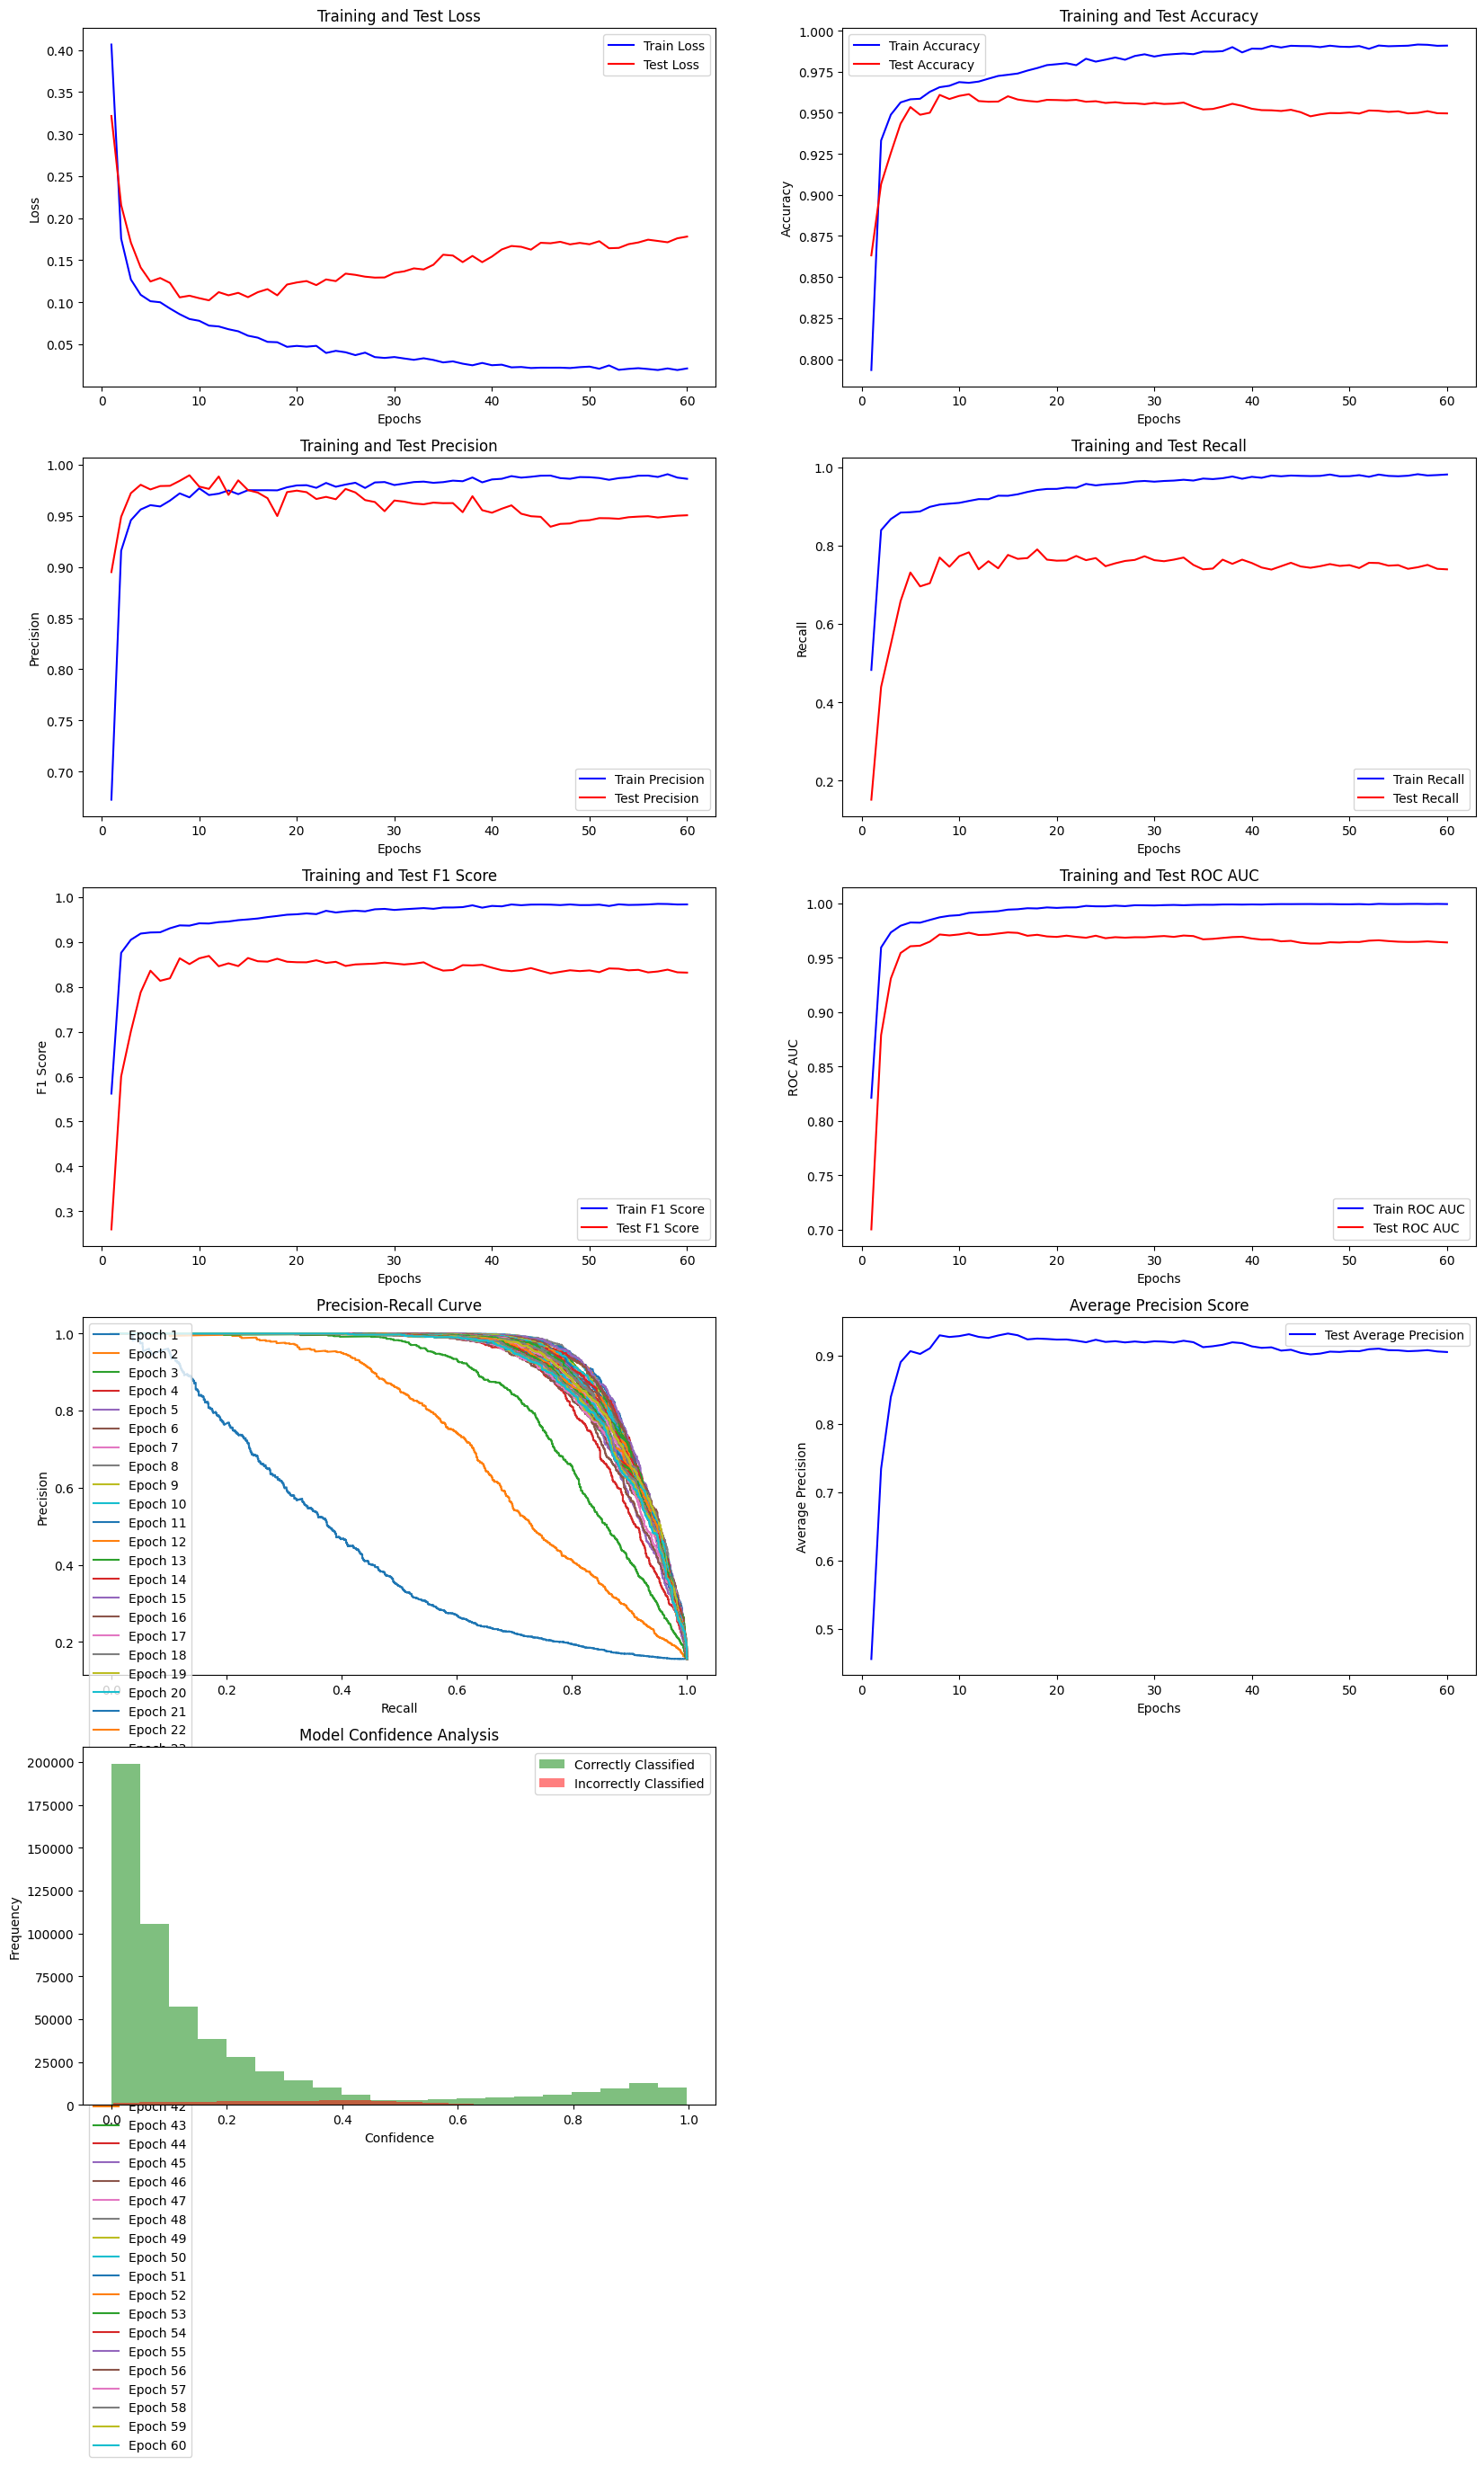

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_5.jpeg


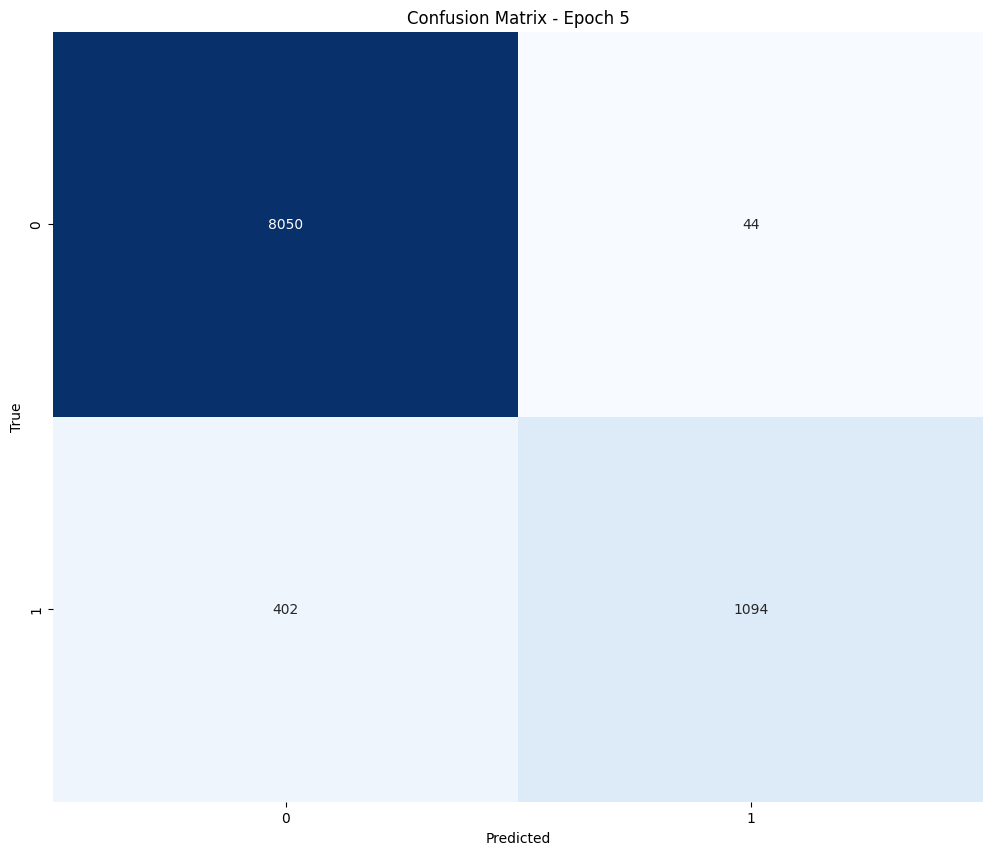

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_10.jpeg


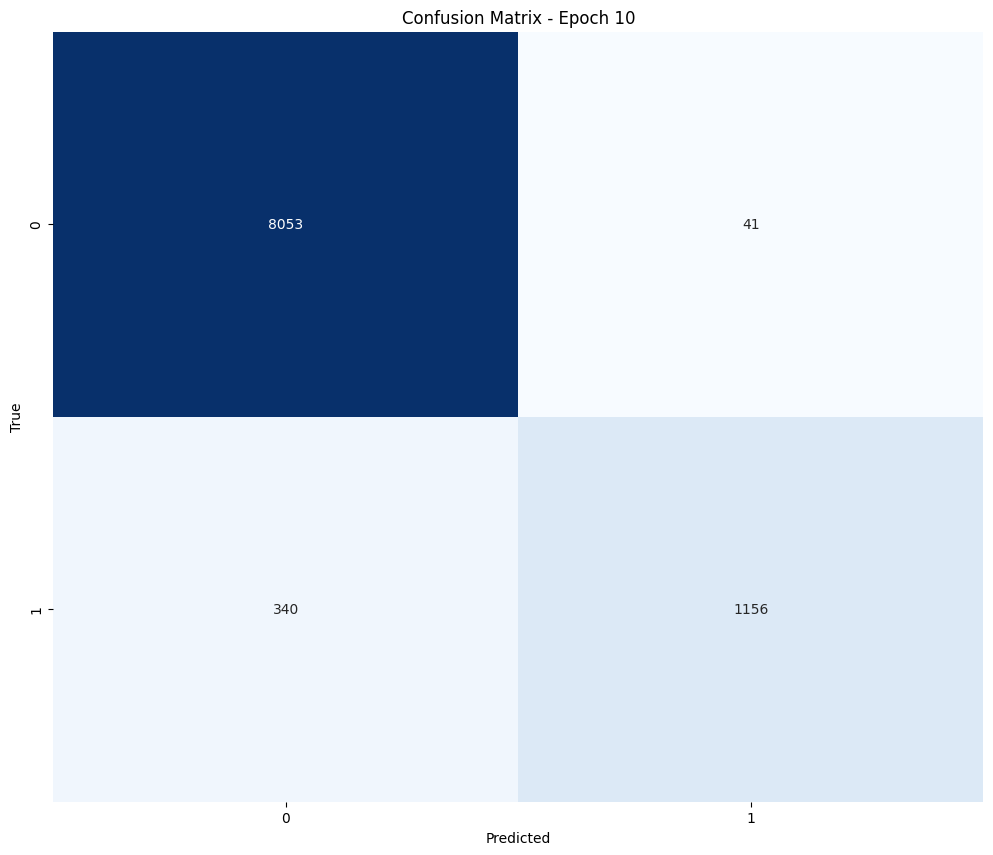

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_15.jpeg


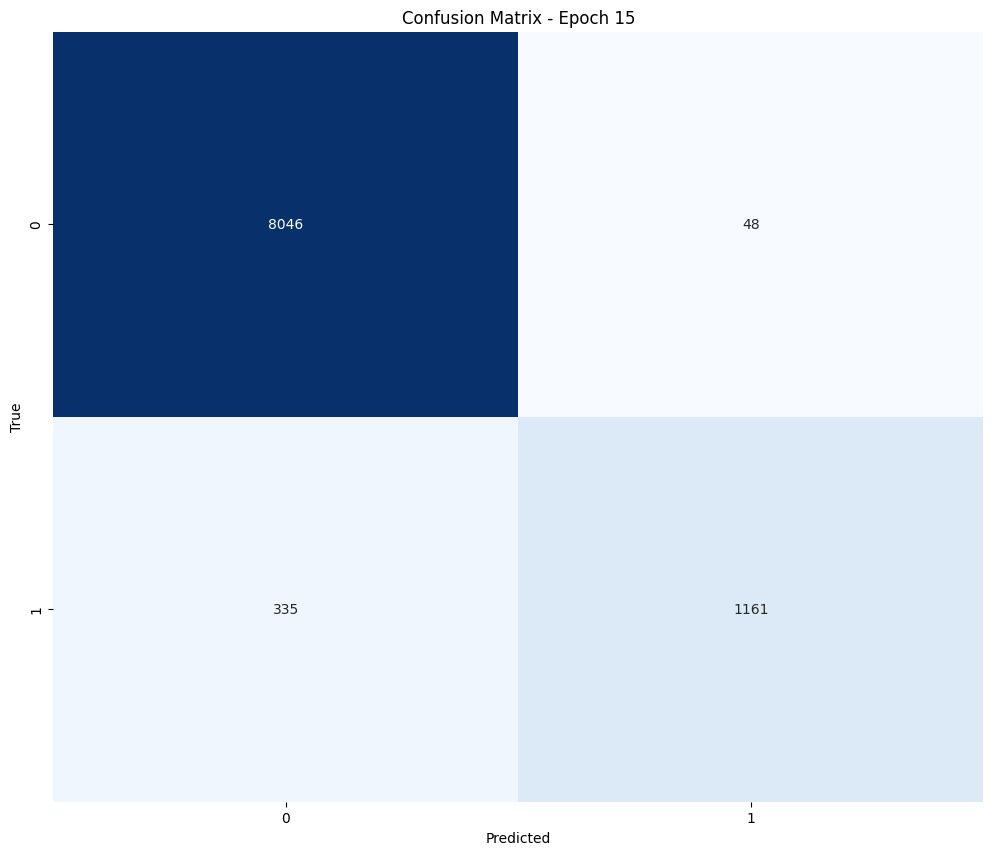

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_20.jpeg


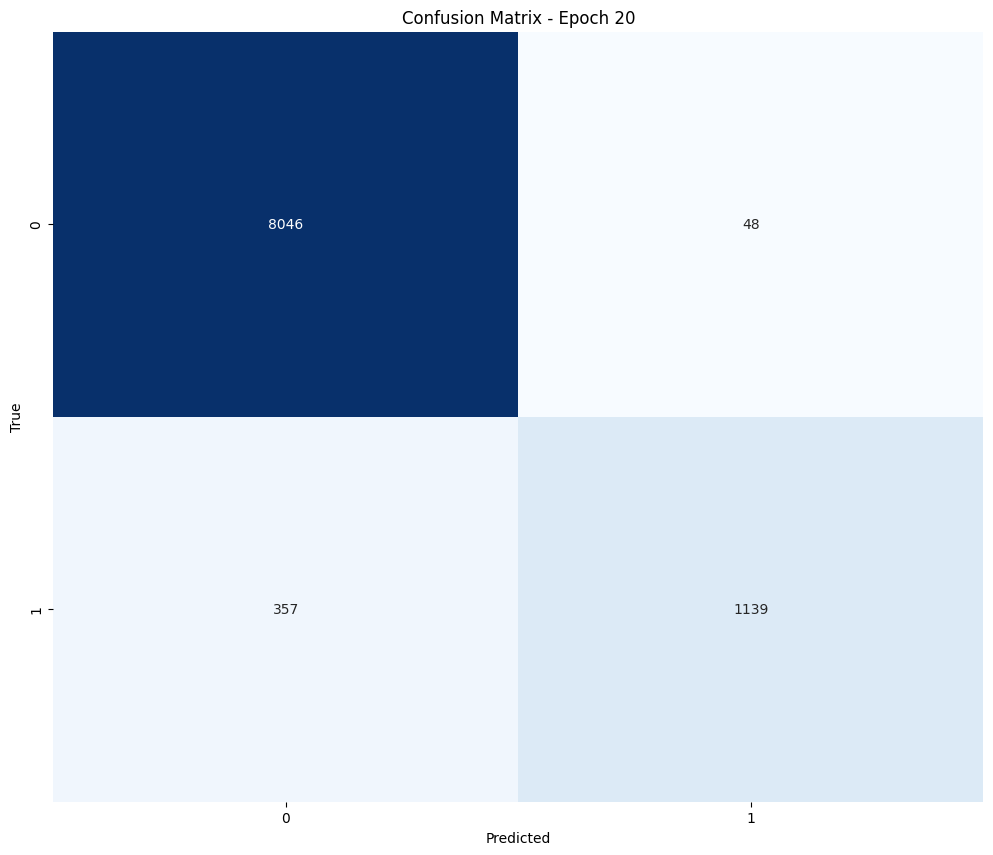

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_25.jpeg


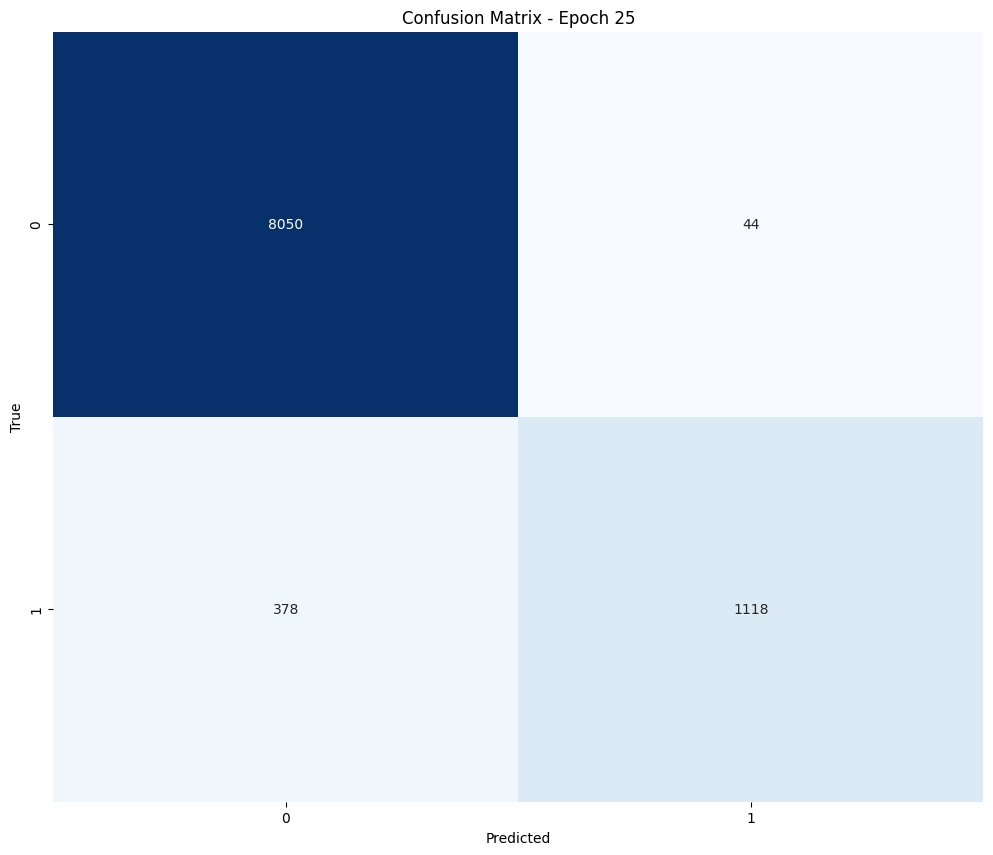

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_30.jpeg


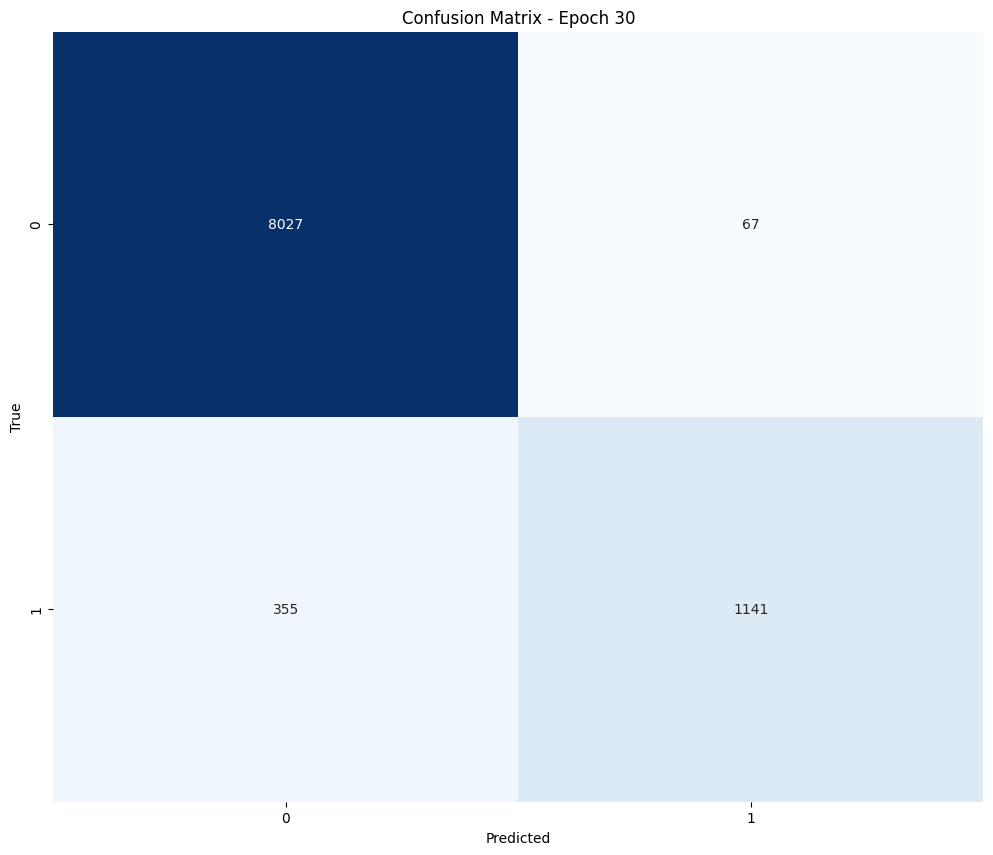

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_35.jpeg


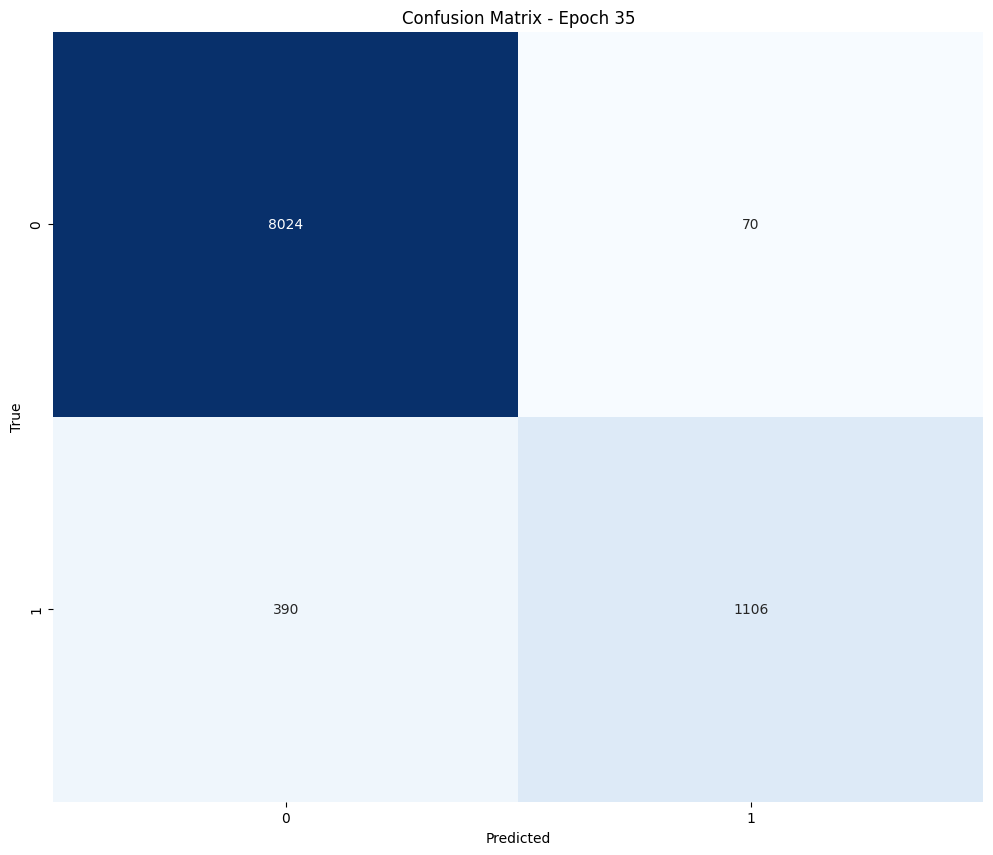

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_40.jpeg


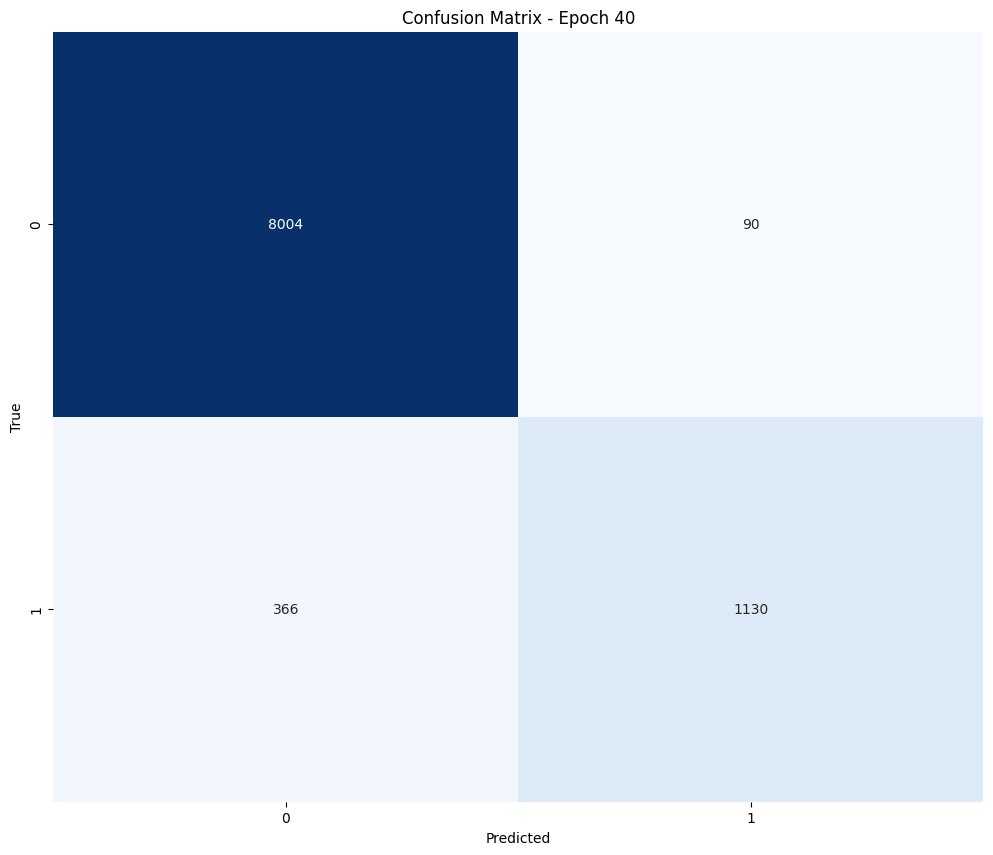

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_45.jpeg


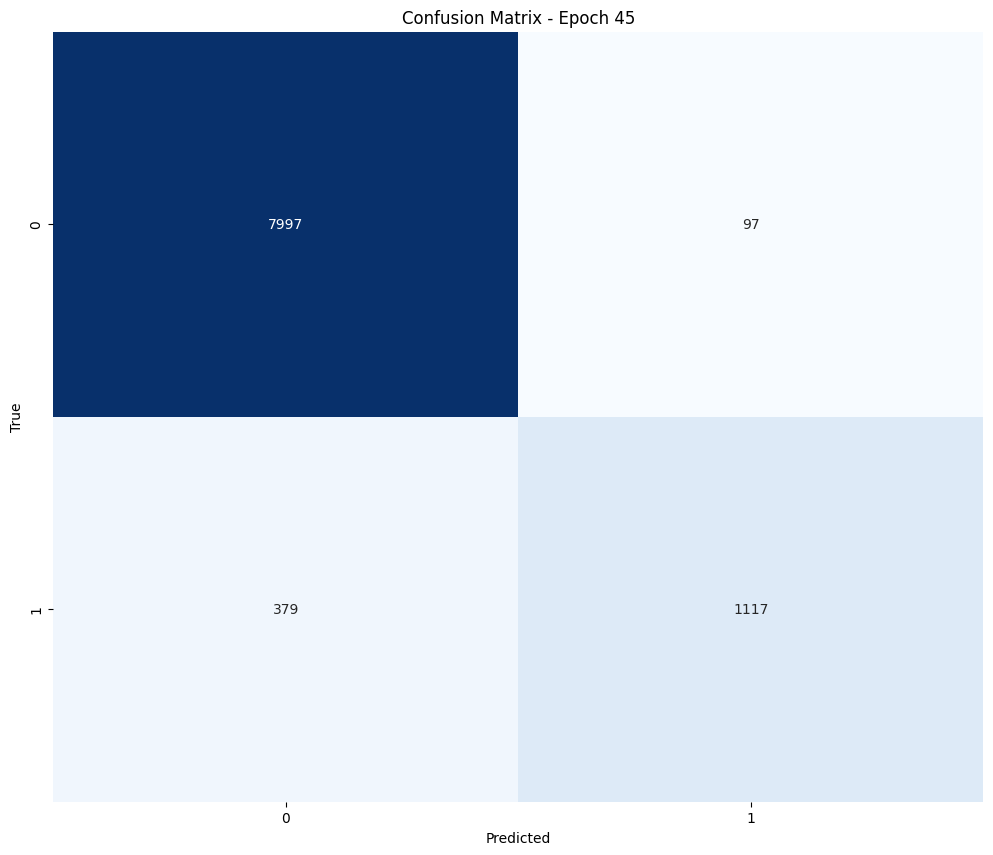

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_50.jpeg


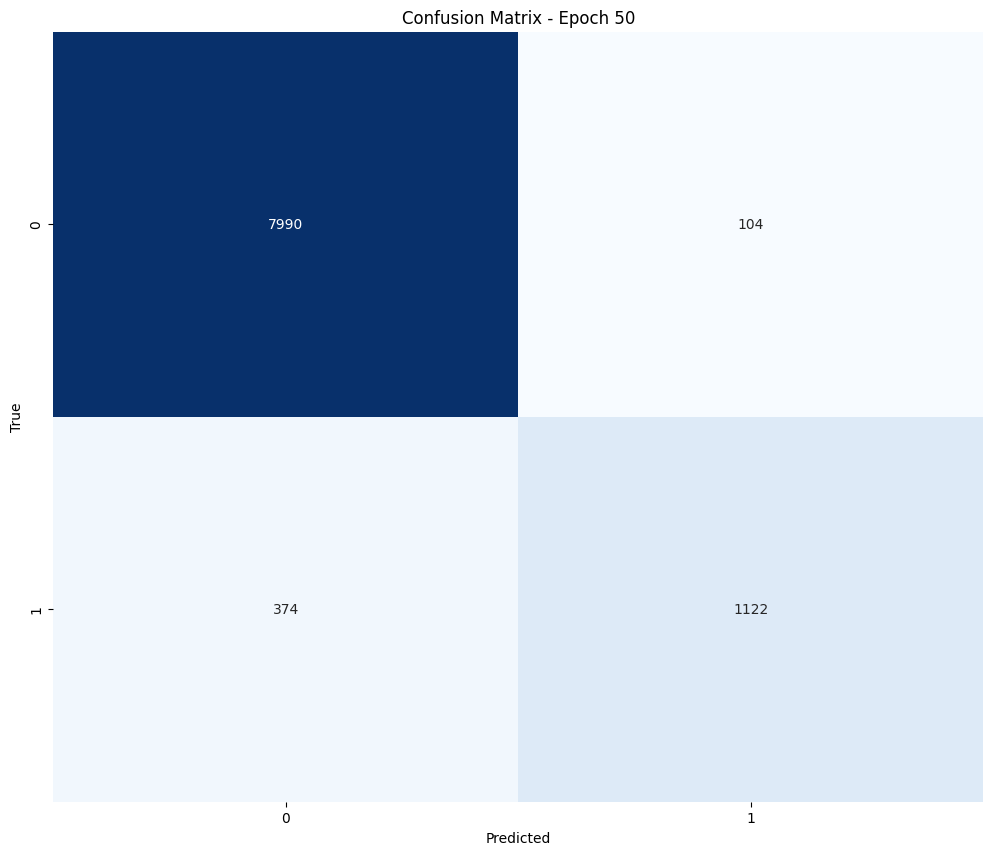

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_55.jpeg


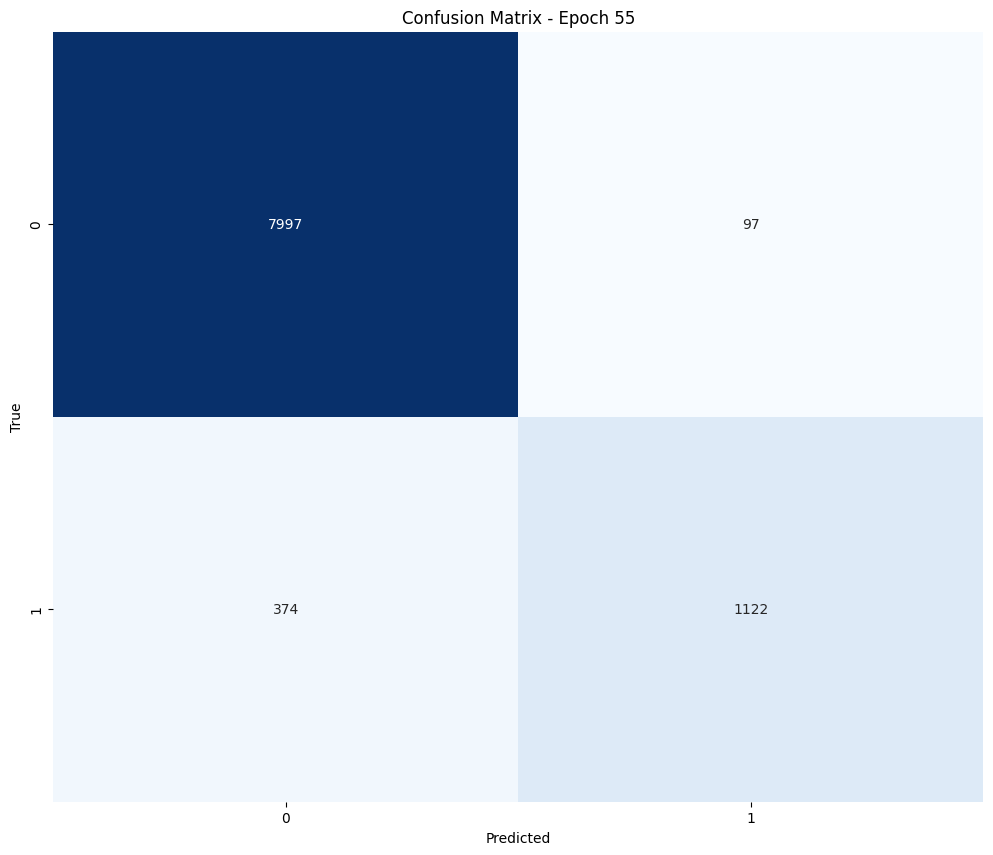

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_60.jpeg


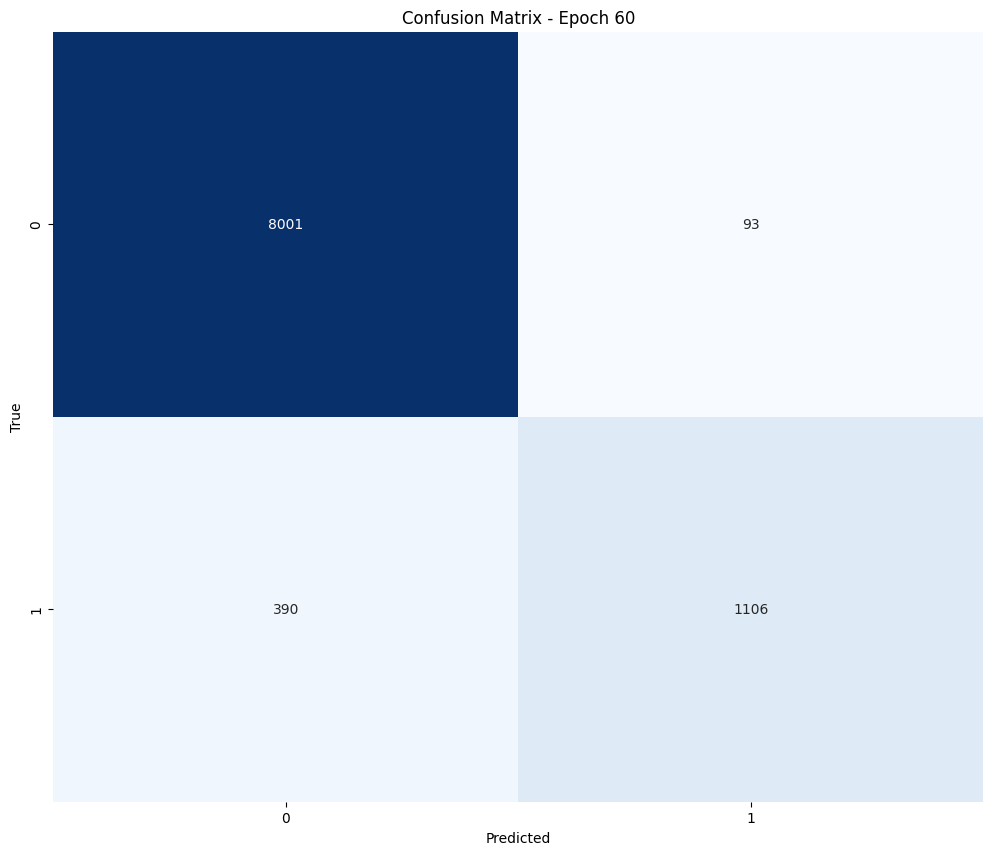

In [54]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Ensure you have tqdm imported

def plot_combined_metrics(H_pass1, H_pass2):
    # Combine metrics from Pass 1 and Pass 2
    combined_H = {}
    for key in H_pass1:
        combined_H[key] = H_pass1[key] + H_pass2[key]  # Concatenate metrics for Pass 1 and Pass 2
    
    # Number of epochs for combined training
    epochs = range(1, len(combined_H["train_loss"]) + 1)

    plt.figure(figsize=(20, 30))

    # Plot Training and Test Loss
    plt.subplot(5, 2, 1)
    plt.plot(epochs, combined_H["train_loss"], 'b', label='Train Loss')
    plt.plot(epochs, combined_H["test_loss"], 'r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Test Accuracy
    plt.subplot(5, 2, 2)
    plt.plot(epochs, combined_H["train_acc"], 'b', label='Train Accuracy')
    plt.plot(epochs, combined_H["test_acc"], 'r', label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Test Precision
    plt.subplot(5, 2, 3)
    plt.plot(epochs, combined_H["train_precision"], 'b', label='Train Precision')
    plt.plot(epochs, combined_H["test_precision"], 'r', label='Test Precision')
    plt.title('Training and Test Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Training and Test Recall
    plt.subplot(5, 2, 4)
    plt.plot(epochs, combined_H["train_recall"], 'b', label='Train Recall')
    plt.plot(epochs, combined_H["test_recall"], 'r', label='Test Recall')
    plt.title('Training and Test Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Training and Test F1 Score
    plt.subplot(5, 2, 5)
    plt.plot(epochs, combined_H["train_f1"], 'b', label='Train F1 Score')
    plt.plot(epochs, combined_H["test_f1"], 'r', label='Test F1 Score')
    plt.title('Training and Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    # Plot Training and Test ROC AUC
    plt.subplot(5, 2, 6)
    plt.plot(epochs, combined_H["train_roc_auc"], 'b', label='Train ROC AUC')
    plt.plot(epochs, combined_H["test_roc_auc"], 'r', label='Test ROC AUC')
    plt.title('Training and Test ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()

    # Plot Precision-Recall Curve for each epoch (from Pass 1 and Pass 2)
    plt.subplot(5, 2, 7)
    for i, (precision, recall) in enumerate(combined_H["test_precision_recall_curve"]):
        plt.plot(recall, precision, label=f'Epoch {i+1}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Average Precision Score
    plt.subplot(5, 2, 8)
    plt.plot(epochs, combined_H["test_average_precision"], 'b', label='Test Average Precision')
    plt.title('Average Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Average Precision')
    plt.legend()
    
    # Confidence Analysis Visualization
    plt.subplot(5, 2, 9)
    plt.hist(combined_H["correct_confidences"], bins=20, alpha=0.5, label='Correctly Classified', color='g')
    plt.hist(combined_H["incorrect_confidences"], bins=20, alpha=0.5, label='Incorrectly Classified', color='r')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Analysis')
    plt.legend()

    plt.tight_layout()

    # Save the plot with higher DPI for better quality
    plot_filename = os.path.join(PLOT_PATH, "model_metrics_plot.jpeg")
    plt.savefig(plot_filename, format='jpeg', dpi=300)
    print(f"Plot saved to {plot_filename}")

    # Display the plot in the notebook
    plt.show()  # Show the plot in the notebook

    plt.close()  # Ensure the plot is cleared after saving to avoid showing it blank

    # Plot Confusion Matrices every 5 epochs
    for i, cm in enumerate(combined_H["confusion_matrices"]):
        if (i + 1) % 5 == 0:  # Plot every 5 epochs
            plt.figure(figsize=(12, 10))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - Epoch {i+1}')
            plt.xlabel('Predicted')
            plt.ylabel('True')

            # Save confusion matrix plots
            cm_filename = os.path.join(PLOT_PATH, f"confusion_matrix_epoch_{i+1}.jpeg")
            plt.savefig(cm_filename, format='jpeg', dpi=300)
            print(f"Confusion Matrix saved to {cm_filename}")

            plt.show()  # Show confusion matrix in the notebook
            plt.close()  # Close the plot to avoid memory issues

# Function call to plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)


# interactive visual comparison for predictions


In [57]:
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the test CSV to get metadata information (only used for loading purposes, not during visualization)
def load_metadata(csv_path):
    return pd.read_csv(csv_path)

# Define Function for Interactive Visual Comparison of 20 Random Images
def interactive_visual_comparison(model, test_loader, device):
    model.eval()
    all_images = []
    all_targets = []
    all_preds = []
    transform_back = transforms.ToPILImage()

    with torch.no_grad():
        for images, metadata, targets in test_loader:  # Removed 'image_names' from the DataLoader
            images, metadata = images.to(device), metadata.to(device)
            targets = targets.to(device)
            
            # Make predictions
            outputs = model(images, metadata)
            preds = torch.sigmoid(outputs).round()  # Convert logits to binary predictions (0 or 1)
            
            # Store images, targets, and predictions
            all_images.extend(images.cpu().detach())
            all_targets.extend(targets.cpu().detach().numpy())
            all_preds.extend(preds.cpu().detach().numpy())
    
    # Randomly select 20 samples
    indices = random.sample(range(len(all_images)), 20)
    
    plt.figure(figsize=(20, 40))
    for i, idx in enumerate(indices):
        original_label = "malignant" if all_targets[idx] == 1 else "benign"
        predicted_label = "malignant" if all_preds[idx] == 1 else "benign"

        # Convert image tensor back to PIL image
        img = transform_back(all_images[idx])
        
        # Plot the image and prediction details
        plt.subplot(10, 2, i + 1)  # Corrected the subplot number
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
        
    plt.tight_layout()
    plt.show()



# lesion predictions


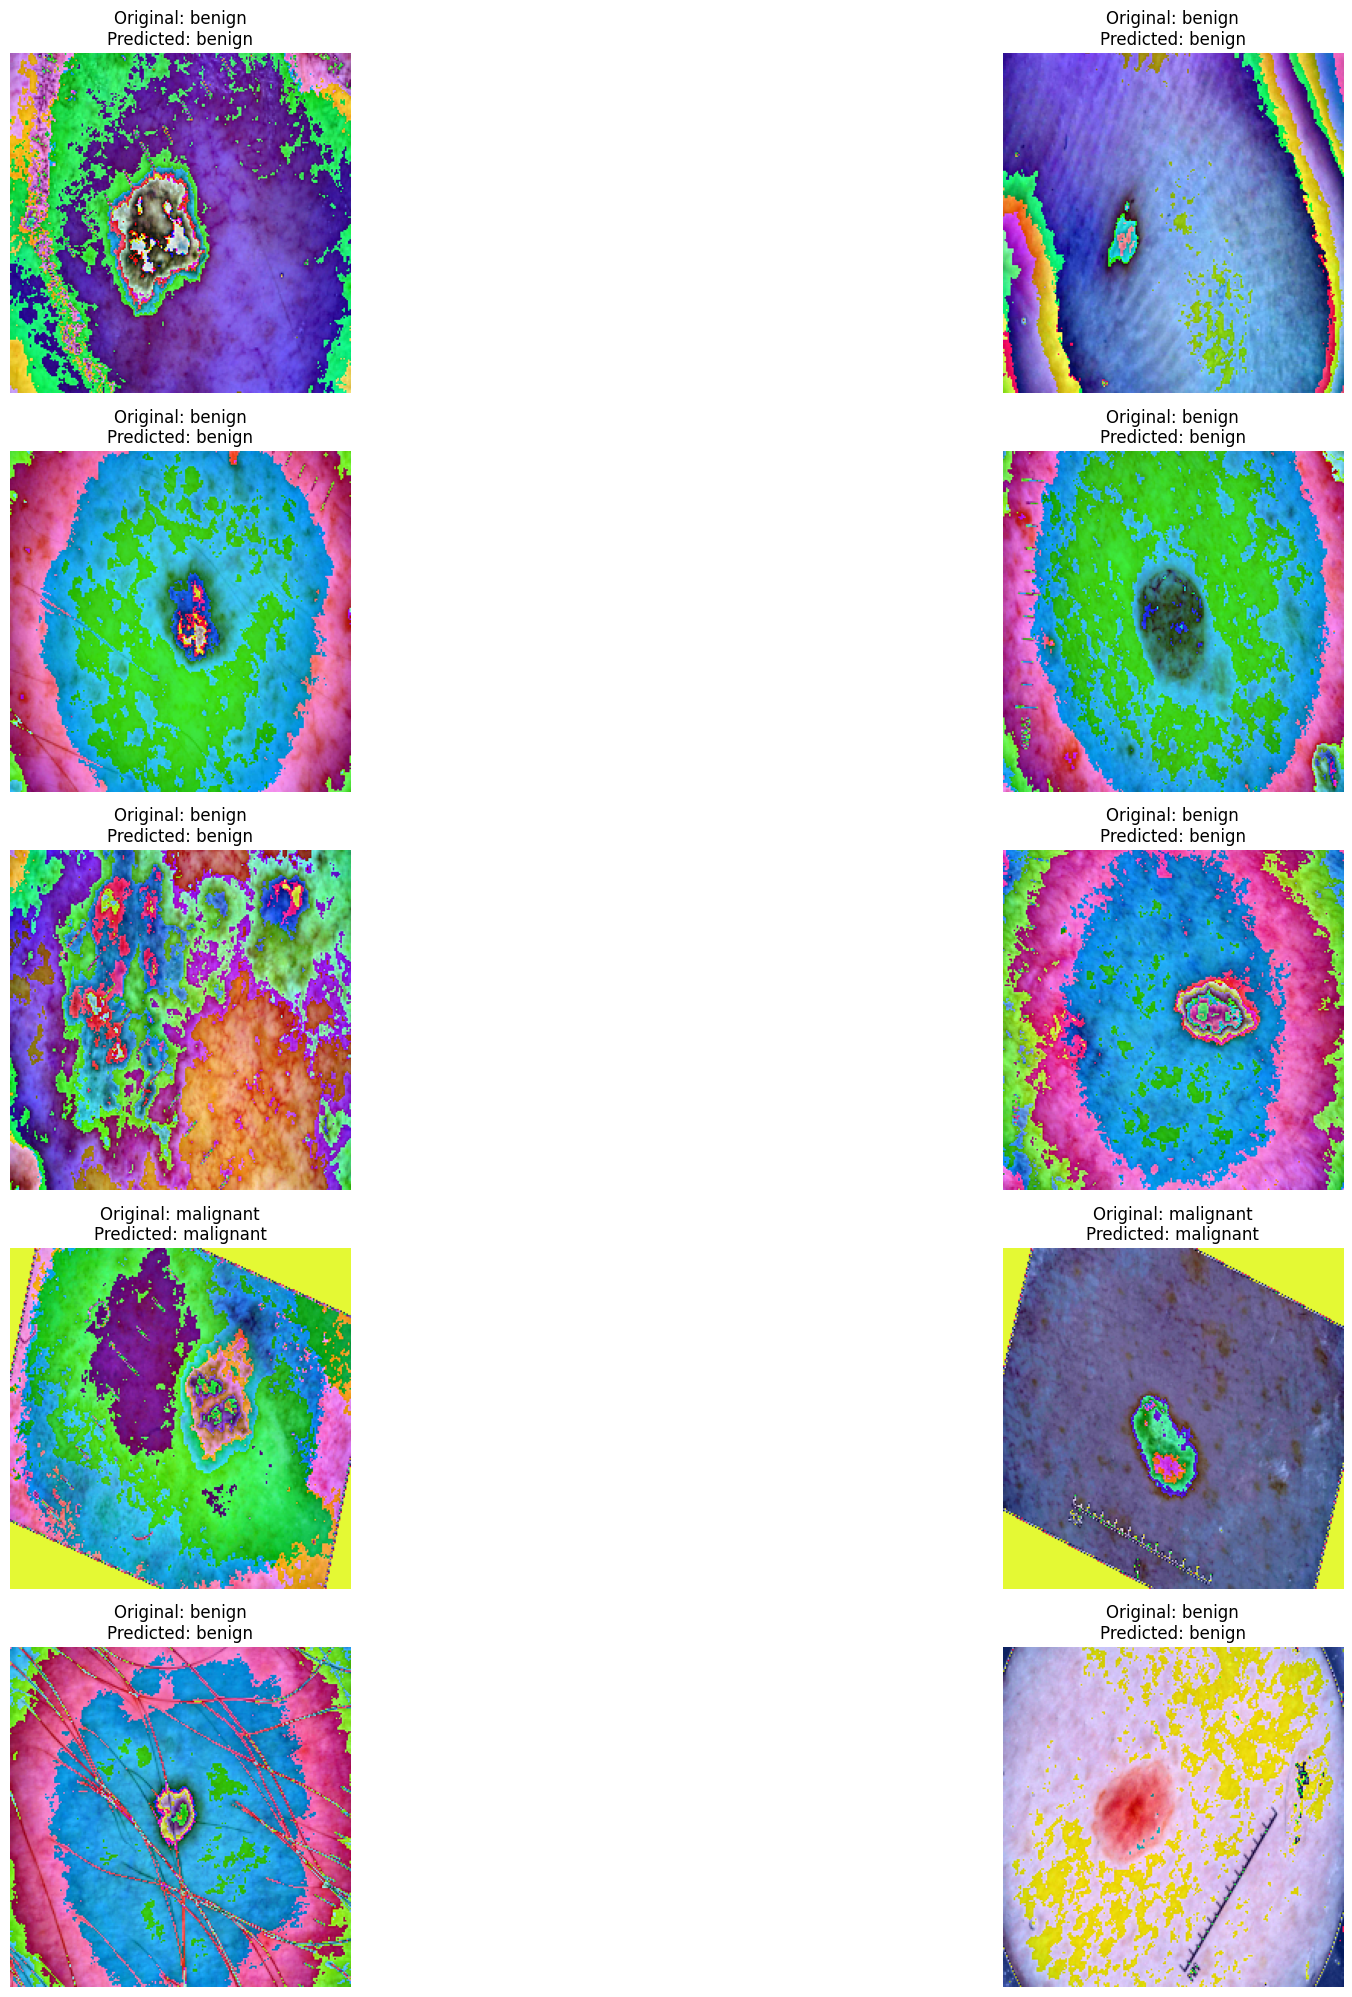

In [58]:
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
test_metadata_df = LesionPredictions.load_metadata(TEST_CSV_PATH)

# Make sure to define 'model', 'test_loader', and 'DEVICE'
visualizer = LesionPredictions(model, test_loader, DEVICE)
visualizer.inference_prediction()

# GUI based tool making predictions

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import os
import torch
import pandas as pd
from torchvision import transforms
from PIL import Image
from resnet_model import ResNetModel  # Import your ResNet model class

# Define the device to run the model on
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
def load_model(model_path):
    # Initialize model
    num_metadata_features = 3  # Update based on your model's requirements
    model = ResNetModel(num_metadata_features).to(DEVICE)
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

# Prediction function
def predict(image_path, metadata):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device
    sex_encoded = metadata['sex']
    age = metadata['age']
    site_encoded = metadata['site']
    input_metadata = torch.tensor([sex_encoded, age, site_encoded], dtype=torch.float).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device

    with torch.no_grad():
        output = model(image, input_metadata)
        prediction = torch.sigmoid(output).item()
        return "Malignant" if prediction >= 0.5 else "Benign", prediction

# Function to load image and metadata
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display selected image in the GUI
        img_label.config(text=os.path.basename(file_path))
        processing_label.config(text="Processing...")

        # Extract metadata from the CSV files
        metadata = extract_metadata(os.path.basename(file_path))

        if metadata:
            # Perform prediction
            prediction, confidence = predict(file_path, metadata)
            result_label.config(text=f"Prediction: {prediction} (Confidence: {confidence:.2f})")
            processing_label.config(text="")
        else:
            messagebox.showerror("Error", "Metadata not found for the selected image.")

# Extract metadata from the CSV files
def extract_metadata(image_name):
    for csv_file in [TRAIN_CSV_PASS1, TRAIN_CSV_PASS2, TEST_CSV_PATH]:
        df = pd.read_csv(csv_file)
        row = df[df['image_name'] == image_name]
        if not row.empty:
            return {
                'sex': row['sex'].values[0],
                'age': row['age_approx'].values[0],
                'site': row['anatom_site_general_challenge'].values[0]
            }
    return None

# Create the main window
root = tk.Tk()
root.title("Skin Lesion Classification Tool")

# Transform for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the trained model
BASE_DIR = "/home/hifis/hifis0010"
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output', 'melanoma_trained_model.pth')
model = load_model(MODEL_PATH)

# UI Elements
load_button = tk.Button(root, text="Load Image", command=load_image)
load_button.pack()

img_label = tk.Label(root, text="")
img_label.pack()

processing_label = tk.Label(root, text="")
processing_label.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# Logo - replace 'path_to_logo' with the actual path to your logo image
logo_path = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'uds.jpg')
logo = Image.open(logo_path)
logo = logo.resize((220, 150), Image.ANTIALIAS)
logo_image = tk.PhotoImage(logo)
logo_label = tk.Label(root, image=logo_image)
logo_label.pack()

# Run the main loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable